In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel(r'C:\Users\Dell\Desktop\Jupyter Notebook\Book1.xlsx',index_col='DATE',parse_dates=True)
df=df.dropna()
print('Shape of data',df.shape)

Shape of data (1821, 5)


In [3]:
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-02-01,35.0,50.0,43.0,657,1756
2014-03-01,36.0,45.0,41.0,657,1757
2014-04-01,32.0,41.0,37.0,658,1757
2014-05-01,24.0,38.0,31.0,658,1758


Text(0, 0.5, 'Average Temperature')

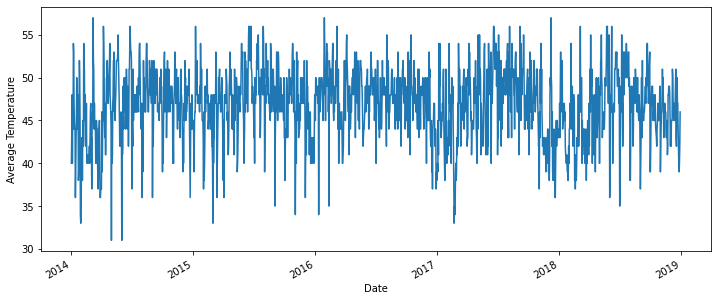

In [4]:
df1=df['AvgTemp'].plot(figsize=(12,5))
df1.set_xlabel("Date")
df1.set_ylabel("Average Temperature")

In [5]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [6]:
stepwise_fit = auto_arima(df['AvgTemp'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.762
Date:                Sat, 21 May 2022   AIC                           8295.525
Time:                        23:28:25   BIC                           8339.582
Sample:                             0   HQIC                          8311.778
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3208      0.385      3.427      0.001       0.566       2.076
ar.L1          0.9716      0.008    117.077      0.000       0.955       0.988
ma.L1         -0.1231      0.024     -5.190      0.000      -0.170      -0.077
ma.L2         -0.2179      0.024     -9.026      0.000      -0.265      -0.171
ma.L3         -0.2028      0.024     -8.502      0.000      -0.250      -0.156
ma.L4         -0.1353      0.023     -5.971      0.000      -0.180      -0.091
ma.L5         -0.0484      0.024     -1.995      0.046      -0.096      -0.001
sigma2         5.4604      0.170     32.166      0.000       5.128       5.793
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                21.17
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
from statsmodels.tsa.arima.model import ARIMA

In [8]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1821, 5)
(1791, 5) (30, 5)


In [9]:
model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Sat, 21 May 2022   AIC                           8156.395
Time:                        23:28:26   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
pred.index=df.index[start:end+1]
print(pred)

DATE
2018-01-12    44.754109
2018-02-12    44.987795
2018-03-12    45.388741
2018-04-12    45.721546
2018-05-12    45.863733
2018-06-12    45.874126
2018-07-12    45.884370
2018-08-12    45.894466
2018-09-12    45.904417
2018-10-12    45.914225
2018-11-12    45.923891
2018-12-12    45.933419
2018-12-13    45.942809
2018-12-14    45.952064
2018-12-15    45.961185
2018-12-16    45.970176
2018-12-17    45.979037
2018-12-18    45.987770
2018-12-19    45.996377
2018-12-20    46.004861
2018-12-21    46.013222
2018-12-22    46.021464
2018-12-23    46.029586
2018-12-24    46.037591
2018-12-25    46.045482
2018-12-26    46.053258
2018-12-27    46.060923
2018-12-28    46.068477
2018-12-29    46.075923
2018-12-30    46.083261
Name: predicted_mean, dtype: float64


<AxesSubplot:xlabel='DATE'>

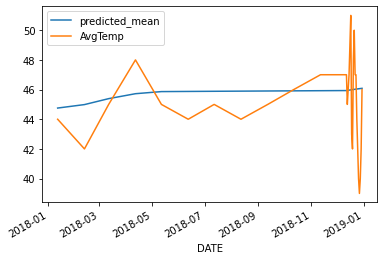

In [11]:
pred.plot(legend='ARIMA Predictions')
test['AvgTemp'].plot(legend=True)

In [12]:
test['AvgTemp'].mean()

45.0

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

3.000463941050319


In [14]:
from statsmodels.tsa.arima.model import ARIMA
model2=ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


In [15]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
print(pred)

2018-12-30    46.418166
2018-12-31    46.113912
2019-01-01    45.617874
2019-01-02    45.249566
2019-01-03    45.116916
2019-01-04    45.136667
2019-01-05    45.156141
2019-01-06    45.175342
2019-01-07    45.194275
2019-01-08    45.212944
2019-01-09    45.231350
2019-01-10    45.249500
2019-01-11    45.267395
2019-01-12    45.285040
2019-01-13    45.302438
2019-01-14    45.319593
2019-01-15    45.336507
2019-01-16    45.353185
2019-01-17    45.369630
2019-01-18    45.385844
2019-01-19    45.401832
2019-01-20    45.417596
2019-01-21    45.433139
2019-01-22    45.448465
2019-01-23    45.463576
2019-01-24    45.478476
2019-01-25    45.493168
2019-01-26    45.507654
2019-01-27    45.521937
2019-01-28    45.536020
2019-01-29    45.549907
Freq: D, Name: ARIMA Predictions, dtype: float64


Text(0, 0.5, 'Predicted Average Temperature')

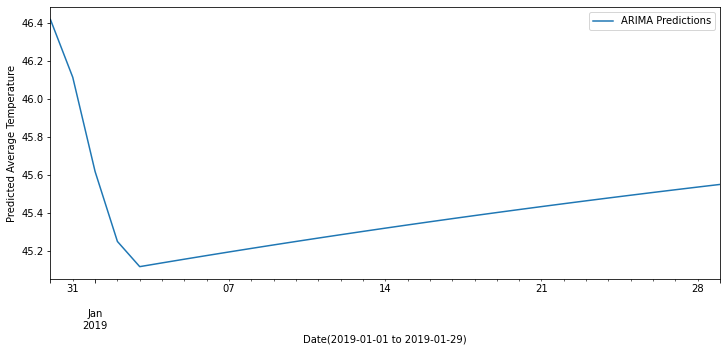

In [16]:
df2=pred.plot(figsize=(12,5),legend=True)
df2.set_xlabel("Date(2019-01-01 to 2019-01-29)")
df2.set_ylabel("Predicted Average Temperature")